# Init stuff

## Imports

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [23]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob

In [6]:
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 15
figsize = [30, 15]

## Filecheck

In [4]:
def FileCheck(fn):
    try:
        open(fn, "r")
        return True
    except IOError:
#         print("Error: File does not appear to exist.")
        return False

# plot Elitist Archive

MO-GOMEA: data/200314_100915_1584176955301_zmom_MO-GOMEA_fos=LearnedLT_IMS
NSGA-II: data/200313_192034_1584123634492_ARK-7-MO_NSGA-II_xo=2p_pop=100
MO-LS: data/200314_102842_1584178122666_ARK-Online-2-cifar100_MO-LS-noloop-randdir
MO-RS: 


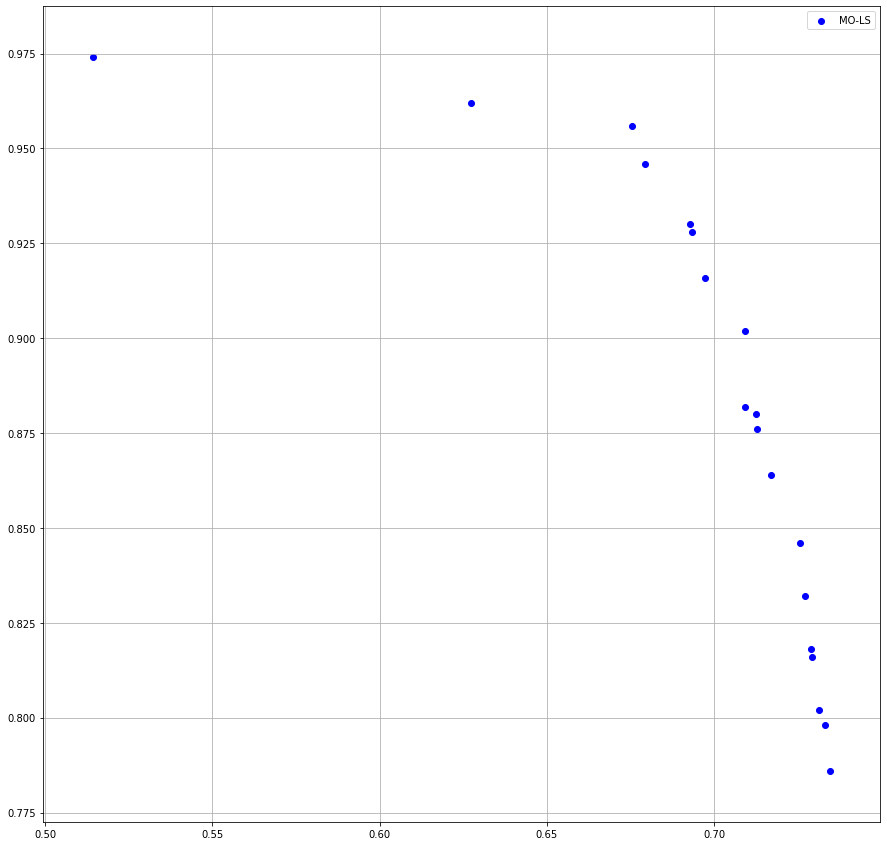

In [55]:
def plotAllOnThisServer (algorithms_to_plot, network_unique_evaluations):
    mogomeadir = ""
    lsdir = ""
    rsdir = ""
    nsgadir = ""
    
    prefix = "data/"
    
    for filename in sorted(os.listdir(prefix)):
        if "MO-GOMEA" in filename:
            mogomeadir = prefix + filename
        elif "MO-LS" in filename:
            lsdir = prefix + filename
        elif "MO-RS" in filename:
            rsdir = prefix + filename
        elif "NSGA-II" in filename:
            nsgadir = prefix + filename
    
    print("MO-GOMEA:", mogomeadir)
    print("NSGA-II:", nsgadir)
    print("MO-LS:", lsdir)
    print("MO-RS:", rsdir)
    
    fig, ax = plt.subplots(figsize=(15,15))
    if mogomeadir is not "" and "MO-GOMEA" in algorithms_to_plot:
        plotArchive(ax, mogomeadir, network_unique_evaluations, color="red", label="MO-GOMEA")
    if nsgadir is not "" and "NSGA-II" in algorithms_to_plot:
        plotArchive(ax, nsgadir, network_unique_evaluations, color="green", label="NSGA-II")
    if lsdir is not "" and "MO-LS" in algorithms_to_plot:
        plotArchive(ax, lsdir, network_unique_evaluations, color="blue", label="MO-LS")
    if rsdir is not "" and "MO-RS" in algorithms_to_plot:
        plotArchive(ax, rsdir, network_unique_evaluations, color="orange", label="MO-RS")
        
    ax.legend()
    ax.grid()

plotAllOnThisServer(["MO-LS"], 100)

(0, 1)

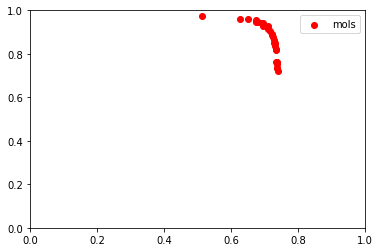

In [87]:
def plotArchive(ax, folder, network_unique_evaluations, color, label):
    filename = folder + "/progress0.json"
    if not FileCheck(filename):
        print("File with name", filename, "could not be found.")
        return
    
    with open(filename) as json_file:
        data = json.load(json_file)
#         print(data.keys())
#         print(data["network_unique_evals"])
        index = -1
        max_network_unique_evaluations = -1
        for i in range(len(data["network_unique_evals"])):
            max_network_unique_evaluations = data["network_unique_evals"][i]
            if data["network_unique_evals"][i] == network_unique_evaluations:
                index = i
                break
                
        if index == -1:
            print("Algorithm did not yet do", network_unique_evaluations, "evaluations. Can plot up to", max_network_unique_evaluations, "evaluations.")
            return
                
        archive = data["elitist_archive"][index]
#         print(archive)

        X = np.zeros(len(archive))
        Y = np.zeros(len(archive))
        
        for i in range(len(archive)):
            X[i] = archive[i]['f'][0]
            Y[i] = archive[i]['f'][1]
            
        ax.scatter(X, Y, color=color, label=label)

        
        
    
fig, ax = plt.subplots()
plotArchive(ax, "data/exp20/200314_102842_1584178122666_ARK-Online-2-cifar100_MO-LS-noloop-randdir/", 689, "red", "mols")
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
    

# Calculation of hypervolume (old)

In [91]:
def calculateHypervolume(archive):
    nparchive = np.zeros((len(archive), 2))
    for i, sol in enumerate(archive):
        nparchive[i, 0] = sol["f"][0]
        nparchive[i, 1] = sol["f"][1]
        
    # Sorting array based on first objective
    sorted_archive = nparchive[np.argsort(nparchive[:, 0])]
    # Reverse array
    sorted_archive = sorted_archive[::-1]

    bottomBoundary = 0
    leftBoundary = 0

    hv = 0
    bottom = bottomBoundary
    for i in range(len(sorted_archive)):
        hv = hv + (sorted_archive[i, 0] - leftBoundary) * (sorted_archive[i, 1] - bottom)
        bottom = sorted_archive[i, 1]

    return hv

## plotting the hypervolume (old)

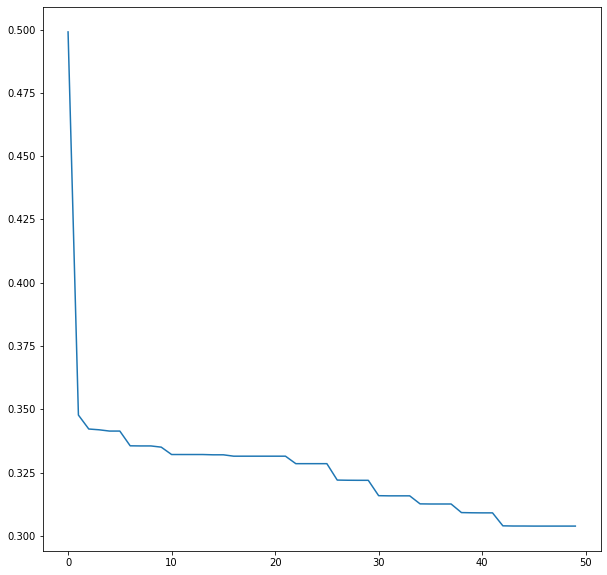

In [92]:
def plotHyperVolume(ax, folder, network_unique_evaluations, color, label):
    filename = folder + "/progress0.json"
    if not FileCheck(filename):
        print("File with name", filename, "could not be found.")
        return
    
    
    with open(filename) as json_file:
        data = json.load(json_file)
#         print(data.keys())
#         print(data["network_unique_evals"])

        unique_evals = -1
        new_unique_evals = -1
        max_network_unique_evaluations = -1
        
        hypervolume = np.zeros(network_unique_evaluations)

        for i in range(len(data["network_unique_evals"])):
            new_unique_evals = data["network_unique_evals"][i]
            if new_unique_evals == unique_evals:
                continue
            unique_evals = new_unique_evals
            max_network_unique_evaluations = unique_evals
            
            archive = data["elitist_archive"][i]
            hv = calculateHypervolume(archive)
            hypervolume[unique_evals - 1] = hv
            
            if max_network_unique_evaluations == network_unique_evaluations:
                break
    
        ax.plot(list(range(len(hypervolume))), 1 - hypervolume)
            
fig, ax = plt.subplots(figsize=(10,10))
plotHyperVolume(ax, "data/exp20/200313_102842_1584178122666_ARK-Online-2-cifar100_MO-LS-noloop-randdir/", 50, color="red", label="MO-LS")

# IMPORTANT: Plotting evaluated MMACs of algorithms over time

##### Old stuff

No handles with labels found to put in legend.
No handles with labels found to put in legend.


dict_keys(['elitist_archive', 'evaluated_solution_fitness', 'evaluated_solution_genotype', 'evaluated_solution_network', 'network_unique_evals', 'total_evals', 'unique_evals'])
dict_keys(['elitist_archive', 'evaluated_solution_fitness', 'evaluated_solution_genotype', 'evaluated_solution_network', 'network_unique_evals', 'total_evals', 'unique_evals'])
dict_keys(['elitist_archive', 'evaluated_solution_fitness', 'evaluated_solution_genotype', 'evaluated_solution_network', 'network_unique_evals', 'total_evals', 'unique_evals'])
dict_keys(['elitist_archive', 'evaluated_solution_fitness', 'evaluated_solution_genotype', 'evaluated_solution_network', 'network_unique_evals', 'total_evals', 'unique_evals'])


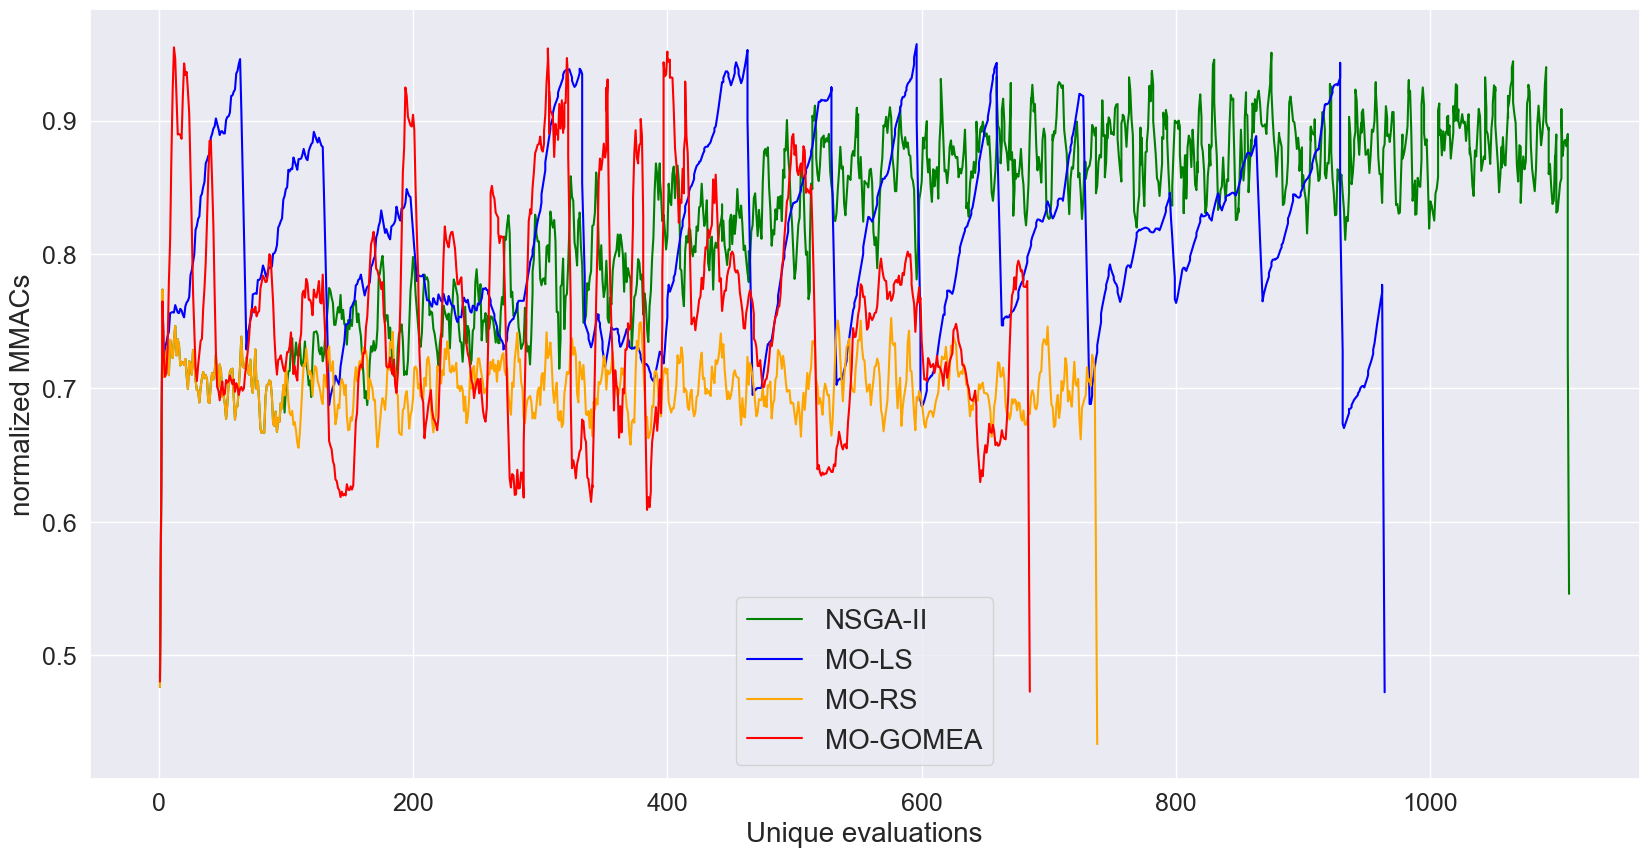

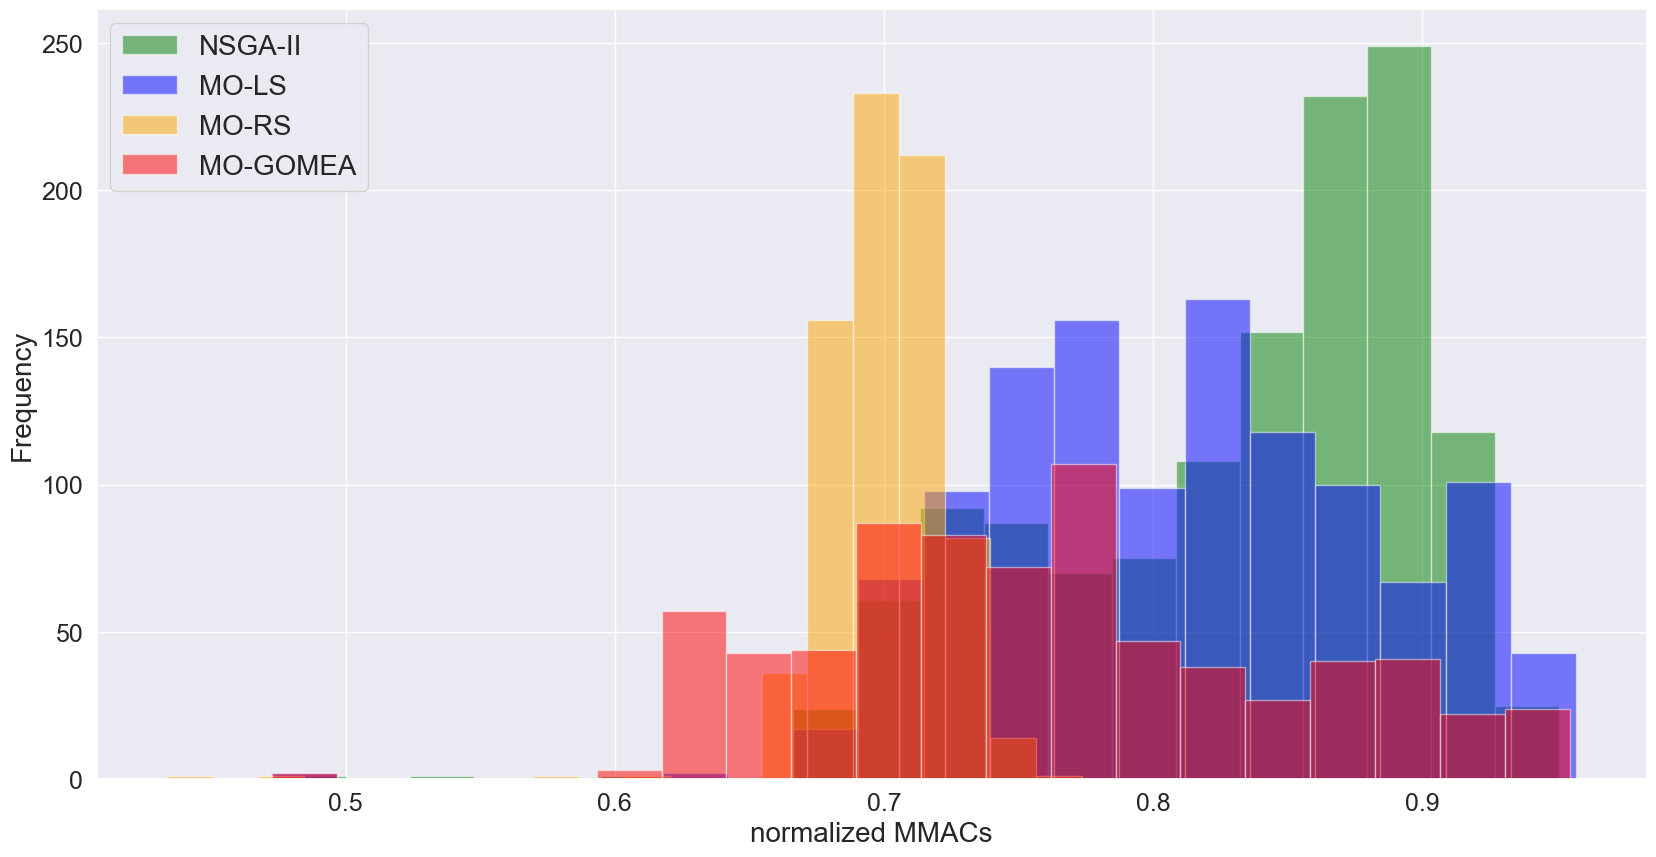

In [242]:
fig, ax = plt.subplots(figsize=(20,10))
fig2, ax2 = plt.subplots(figsize=(20,10))

prefix = "data/meteor02/"
for filedir in sorted(os.listdir(prefix)):
    if 'ARK-Online' in filedir:
        filename = prefix + filedir + "/Progress0.json"
        if not FileCheck(filename):
            print ("Could not find file with name", filename)
            
        if 'MO-GOMEA' in filedir:
            color = "red"
            label = 'MO-GOMEA'
        elif 'NSGA-II' in filedir:
            color = "green"
            label = "NSGA-II"
        elif 'MO-LS' in filedir:
            color = "blue"
            label = "MO-LS"
        elif 'MO-RandomSearch' in filedir:
            color = "orange"
            label = "MO-RS"
        
        with open (filename) as json_file:
            data = json.load(json_file)
            print(data.keys())
#             print(data['network_unique_evals'])
            
            X = []
            Y = []
            
            evals = -1
            for i, e in enumerate(data['network_unique_evals']):
                if int(e) is evals:
#                     print("continue")
                    continue
                evals = int(e)
                X.append(evals)
                Y.append(data['evaluated_solution_fitness'][i][1])
                
            N = 5
            Y = np.convolve(Y, np.ones((N,))/N, mode='same')
                
            ax.plot(X, Y, color=color, label=label)
            ax2.hist(Y, color=color, label=label, bins=20, alpha=0.5)
            
    ax.legend()
    ax.set_xlabel("Unique evaluations")
    ax.set_ylabel("normalized MMACs")
    ax2.legend()
    ax2.set_xlabel("normalized MMACs")
    ax2.set_ylabel("Frequency")

##### New stuff

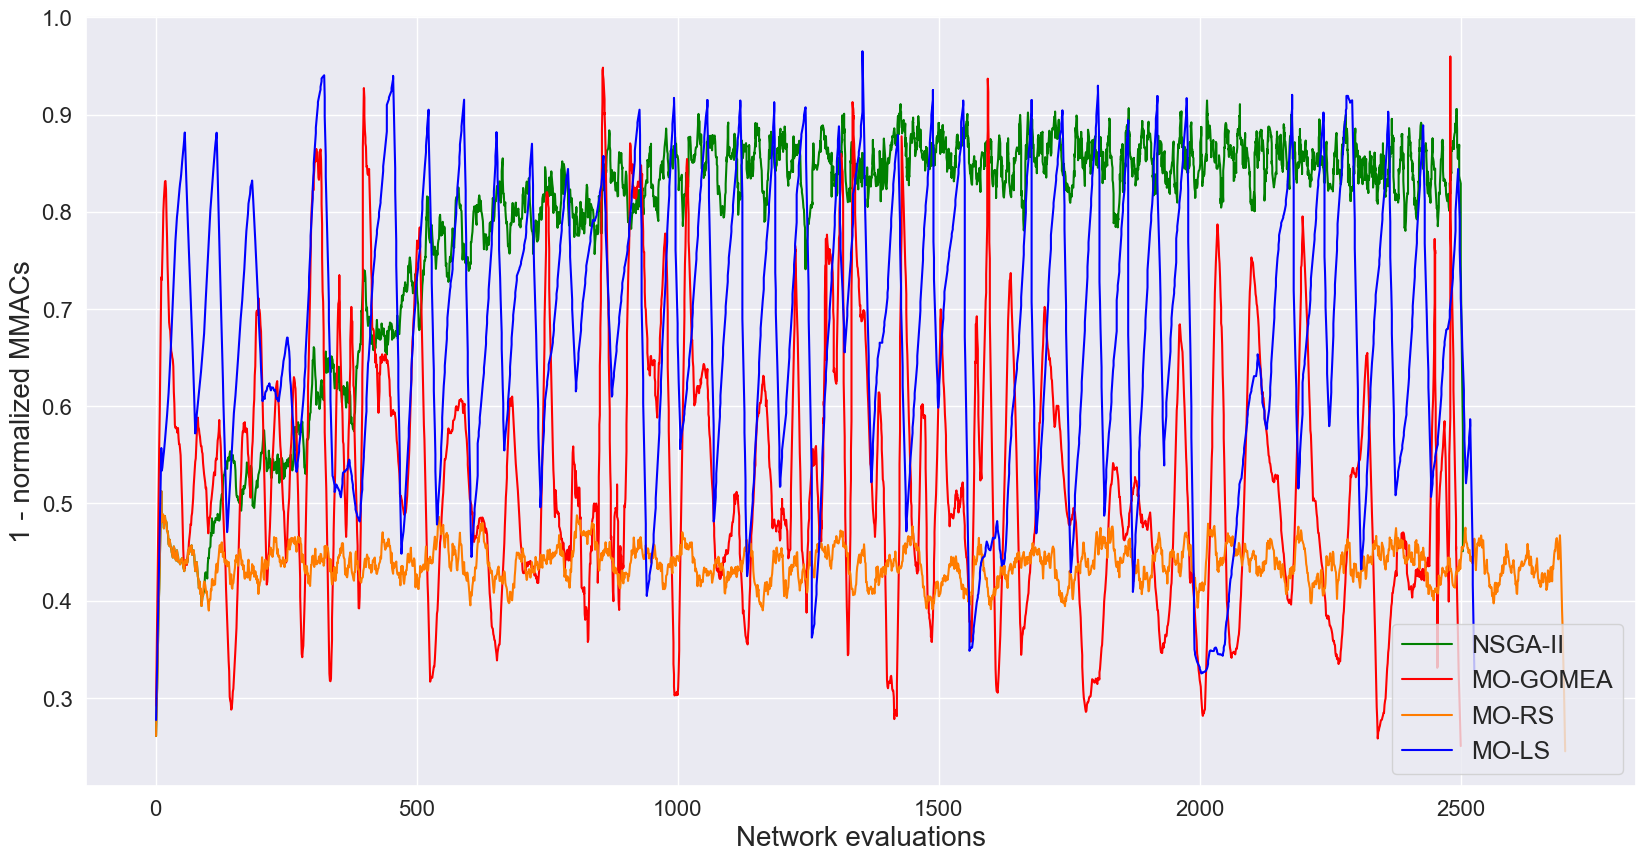

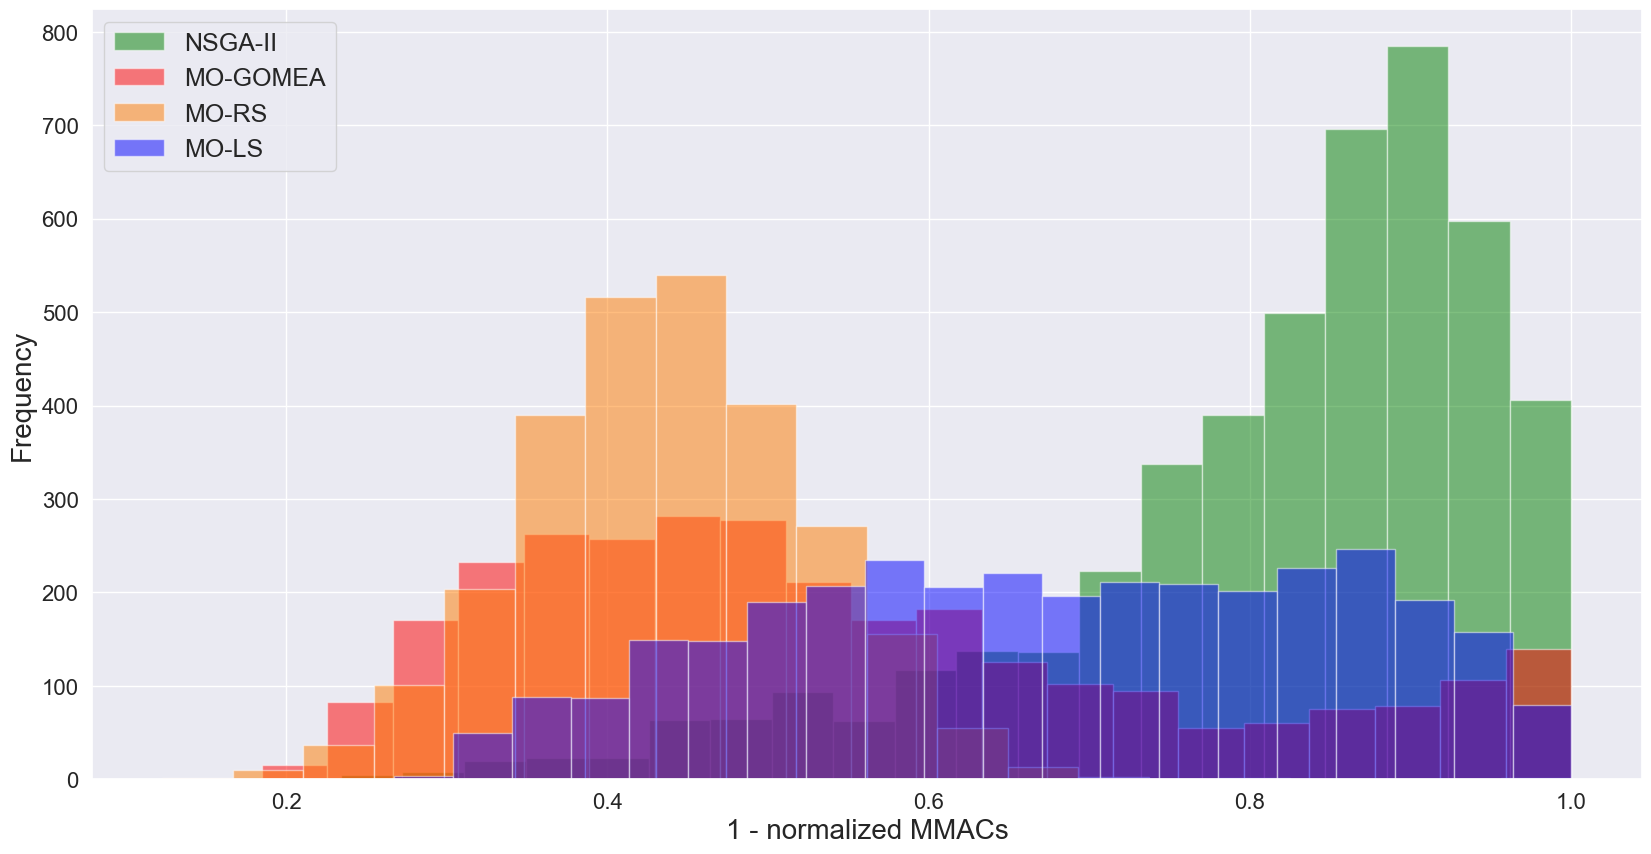

In [286]:
fig, ax = plt.subplots(figsize=(20,10))
fig2, ax2 = plt.subplots(figsize=(20,10))

for i, algo in enumerate(["NSGA-II", "MO-GOMEA", "MO-RS", "MO-LS"]):
    fn = glob.glob("data/online/"+algo+"_run1_seed*/Progress0.json")[0]
    
    with open (fn) as json_file:
        data = json.load(json_file)
#         print(data.keys())
#             print(data['network_unique_evals'])

        X = []
        Y = []

        evals = -1
        for j, e in enumerate(data['network_unique_evals']):
            if int(e) is evals:
#                     print("continue")
                continue
            evals = int(e)
            X.append(evals)
            Y.append(data['evaluated_solution_fitness'][j][1])

        N = 20
        Yconvolved = np.convolve(Y, np.ones((N,))/N, mode='same')
        ax.plot(X, Yconvolved, color=colors[i], label=algo)
        
        ax2.hist(Y, color=colors[i], label=algo, bins=20, alpha=0.5)

            
ax.legend()
ax.set_xlabel("Network evaluations")
ax.set_ylabel("1 - normalized MMACs")
ax2.legend()
ax2.set_xlabel("1 - normalized MMACs")
ax2.set_ylabel("Frequency")

fig.savefig("python/imgs/online_mmac_analysis_plot.pdf", dpi=300, bbox_inches='tight', format='pdf')
fig2.savefig("python/imgs/online_mmac_analysis_hist.pdf", dpi=300, bbox_inches='tight', format='pdf')


# Analysis of different Local Search algorithms (different methods, different amount of loops

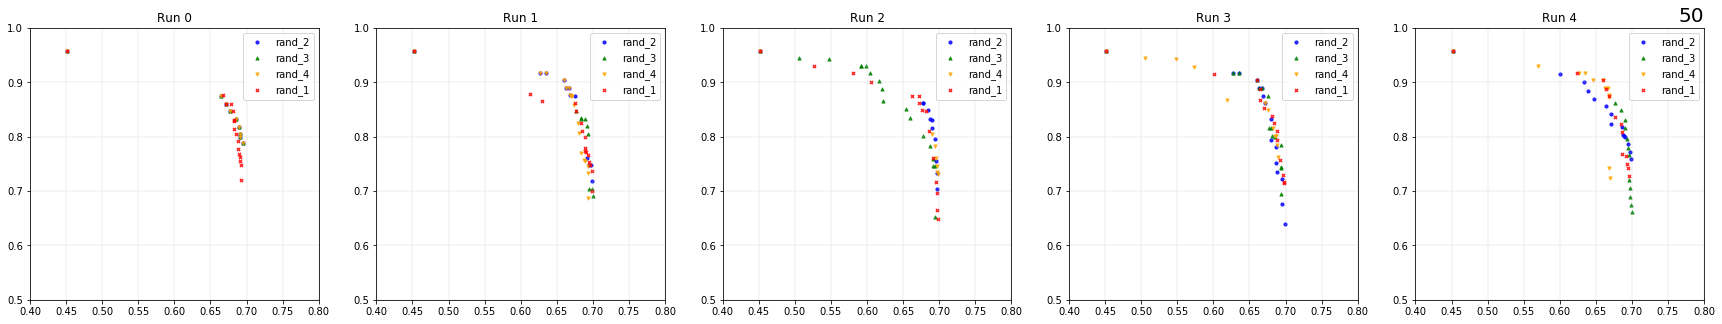

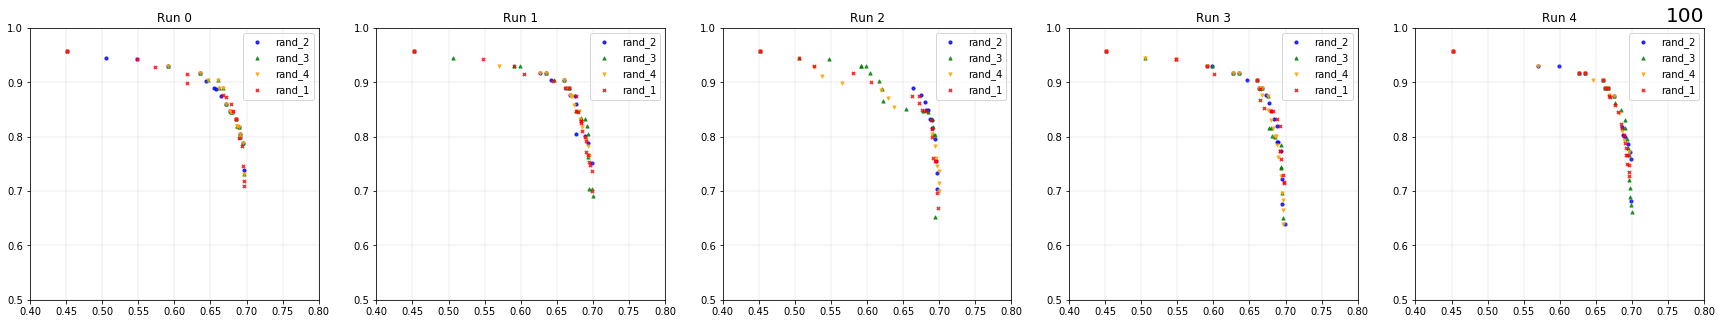

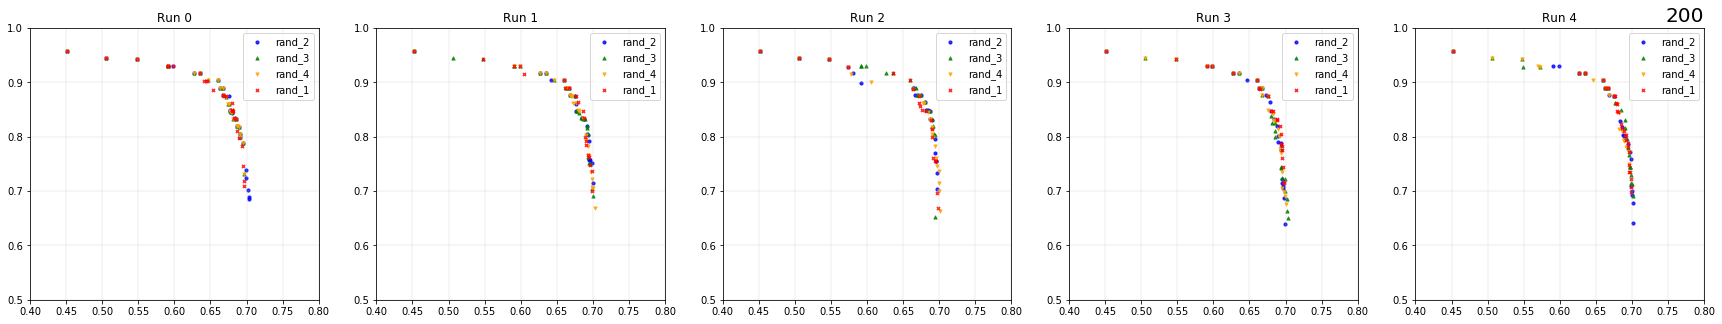

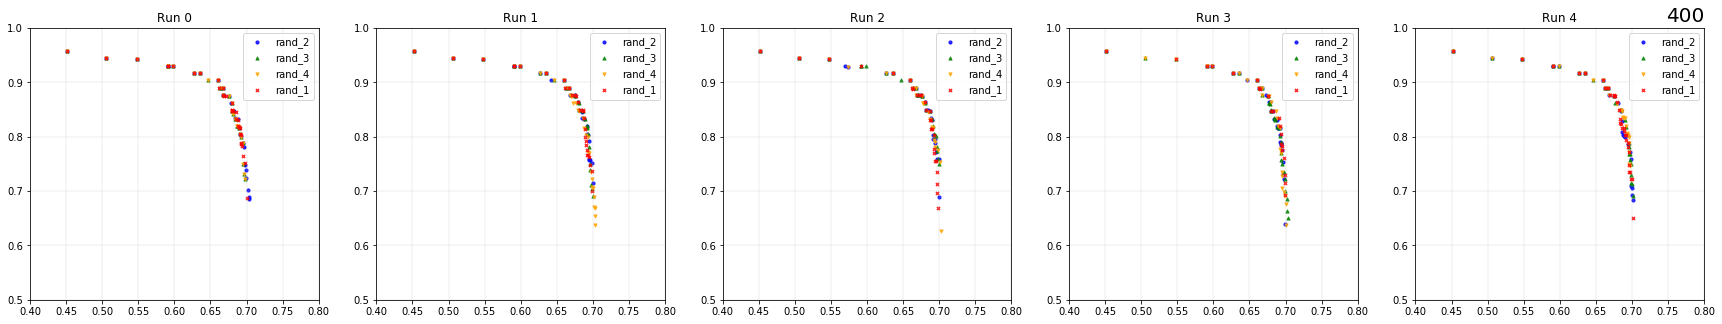

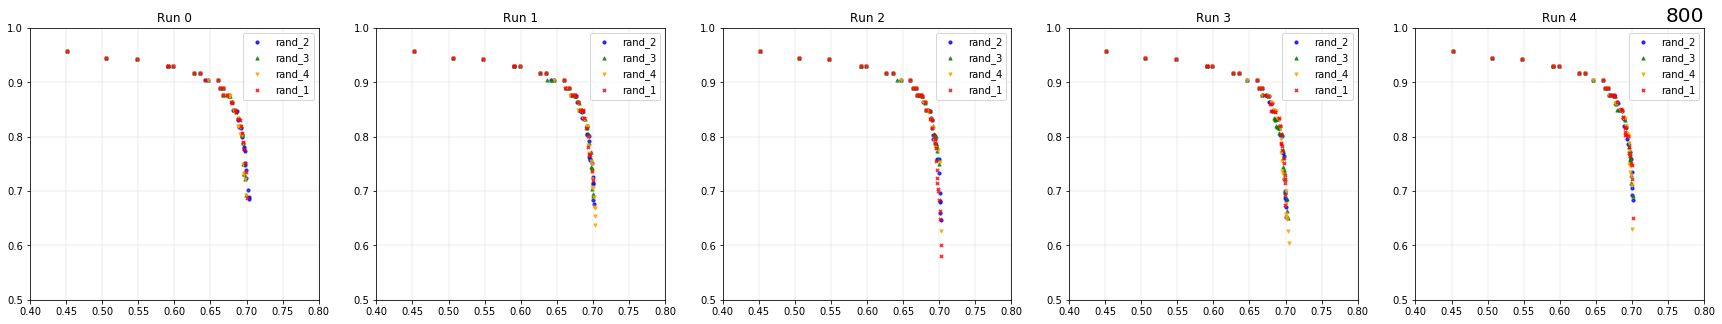

In [193]:
colors = ["red", "blue", "green", "orange"]
markers = ["x", "o", "^", "v"]

def plotArchiveMOLSExperiment(direction, loopcount):
    for targetEvals in [50, 100, 200, 400, 800]:
        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(30,5))

        for i in range(5):
            ax[i].set_xlim(0.4, 0.8)
            ax[i].set_ylim(0.5, 1.0)
            ax[i].grid(linewidth=0.2)
            ax[i].set_title("Run " + str(i))
            plt.title(str(targetEvals), loc="right", size="20")

#             for direction in [0.9, 0.95, 1]:
            for loopcount in [2, 3, 4, 1]:
                with open("data/exp21/MO-LS_dir" + str(direction) + "_loop" + str(loopcount) + "/MO_info" + str(i) + ".json") as json_file:
                    data = json.load(json_file)
                    data = data['changes_on_interval']['network_unique_evals']
                    index = -1
                    for idx in range(len(data['evals'])):
                        if targetEvals <= data['evals'][idx]:
                            index = idx
                            evals = data['evals'][idx]
                            break

                    archive = data['elitist_archive_fitness'][index]

                    X = []
                    Y = []

                    for sol in archive:
                        X.append(sol['f'][0])
                        Y.append(sol['f'][1])

#                     if direction == 0.9:
#                         color="red"
#                     elif direction == 0.95:
#                         color="blue"
#                     else:
#                         color="orange"

                    color = colors[loopcount - 1]
                    marker = markers[loopcount - 1]
                    ax[i].scatter(X, Y, s=10, label=(str(direction) + "_" + str(loopcount)), color=color, alpha=0.8, marker=marker)
            ax[i].legend()

plotArchiveMOLSExperiment("rand", 1)

# IMPORTANT: Plotting hypervolume of online experiments

### Imports

In [5]:
import glob
import json
import numpy as np
import os
import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt
import sys

### F: Filecheck

In [6]:
def FileCheck(fn):
    try:
        open(fn, "r")
        return True
    except IOError:
#         print("Error: File does not appear to exist.")
        return False

### F: getTestAcc (from NewVisualization.ipynb)

In [28]:
def transformGenotype(genotype):
    lst = list(genotype)
    for i in [4, 9, 14]:
        lst[i] = transformReductionCell(lst[i])
    joined = "".join(lst)
    joined = joined.replace("0","")
    return joined

def transformReductionCell(encoding):
    if encoding is '0':
        return "P"
    elif encoding is '1':
        return "A"
    elif encoding is '2':
        return "B"
    elif encoding is '3':
        return "C"
    elif encoding is '4':
        return "D"

# transformGenotype("1340123023210311012")

In [29]:
def getTestAcc(genotypes):
    test_accuracies = np.zeros(len(genotypes))
    for i, g in enumerate(genotypes):
        with open("benchmarks/cifar100_results_combined/model_"+transformGenotype(g)+".json") as json_file:
            data = json.load(json_file)
            test_accuracies[i] = data["test_acc"][0] * 0.01
    return test_accuracies

In [30]:
def filterDominatedSolutions(np_archive):
    n = np_archive.shape[0]
    toInclude = np.ones(n, dtype=bool)
    for i in range(n):
        f = np_archive[i]
        for j in range(n):
            if (np_archive[j,0] > f[0] and np_archive[j,1] >= f[1]) or (np_archive[j,0] >= f[0] and np_archive[j,1] > f[1]):
                toInclude[i] = 0
                break
    return (np_archive[toInclude], np_archive[np.invert(toInclude)])
    

### F: Calculation of hypervolume

In [32]:
def calculateHypervolume(archive, plot="validation"):
    np_archive = np.zeros((len(archive), 2))
    genotypes = [""] * len(archive)
    for i, sol in enumerate(archive):
        if plot is "validation":
            np_archive[i, 0] = sol["f"][0]
        elif plot is "test":
            genotypes[i] = sol["g"]
        
        np_archive[i, 1] = sol["f"][1]

    if plot is "test":
        np_archive[:, 0] = getTestAcc(genotypes)
        np_archive, nopes = filterDominatedSolutions(np_archive)

    # Sorting array based on first objective
    sorted_archive = np_archive[np.argsort(np_archive[:, 0])]
    # Reverse array
    sorted_archive = sorted_archive[::-1]

    bottomBoundary = 0
    leftBoundary = 0

    hv = 0
    bottom = bottomBoundary
    for i in range(len(sorted_archive)):
        hv = hv + (sorted_archive[i, 0] - leftBoundary) * (sorted_archive[i, 1] - bottom)
        bottom = sorted_archive[i, 1]

    return hv

### F: plotting hypervolume

In [24]:
def plotHyperVolume(ax, folder, algo, plot_until, plot="validation", color="black", label="undefined", maxruns=6):
    hypervolume = np.zeros((plot_until, maxruns))
    limit_evals = 10**10
    for run in range(maxruns):
        queriedFilename = folder + algo + "_run" + str(run+1) + "_seed*" + "/progress0.json"
        regexFilenames = glob.glob(queriedFilename)
        if len(regexFilenames) == 0:
#             print("File with name", queriedFilename, "could not be found.")
            hypervolume = hypervolume[:, :run]
#             print(hypervolume.shape)
            break
#         print("reading file " + filename)
        filename = regexFilenames[0]

        with open(filename) as json_file:
            data = json.load(json_file)

            unique_evals = -1
            new_unique_evals = -1

            for i in range(len(data["network_unique_evals"])):
                new_unique_evals = data["network_unique_evals"][i]
                if new_unique_evals == unique_evals:
                    continue
                unique_evals = new_unique_evals

                archive = data["elitist_archive"][i]
                hv = calculateHypervolume(archive, plot)
                hypervolume[unique_evals - 1, run] = hv

                if unique_evals == plot_until:
                    break

            if unique_evals < plot_until:
                hypervolume[unique_evals:, run] = hv
                
            limit_evals = min(limit_evals, unique_evals)
#             print(algo, "run",run+1, "is at",unique_evals,"unique_evaluations")

            # Plot every line
#             ax.plot(list(range(unique_evals)), 1 - hypervolume[:unique_evals,run], color=color, label=label+str(run), alpha=0.2)

    print()
    X = list(range(limit_evals))
    
    Y = 1 - hypervolume[:limit_evals]
    
    #plot mean
#     ax.plot(X, np.mean(Y,1), color=color, label=label)
    
    #plot median
    ax.plot(X, np.median(Y, 1), color=color, label=label)

    #plot percentiles
    Ymin = np.percentile(Y, 25, 1)
    Ymax = np.percentile(Y, 75, 1)
    ax.plot(X, Ymin, color=color, ls="dashed", lw=0.5, alpha=0.5)
    ax.plot(X, Ymax, color=color, ls="dashed", lw=0.5, alpha=0.5)
    ax.fill_between(X, Ymin, Ymax, alpha=0.1, color=color)
    
    #plot minmax
#     ax.fill_between(X, np.min(Y,1), 1 - np.max(hypervolume[:limit_evals],1), alpha=0.3, color=color)
    
    #plot std
#     ax.fill_between(X, np.mean(Y,1) - np.std(Y,1), np.mean(Y,1) + np.std(Y,1), alpha=0.3, color=color)    

### F: combine convergence plots of the 4 different algorithms + ACTUAL PLOTTING

##### Plot init

In [21]:
# def initPlottingStuff(axlabelsize=20, ticklabelsize=18, legendfontsize=20):
from matplotlib.ticker import FormatStrFormatter
mpl.rcParams.update(mpl.rcParamsDefault)
import seaborn as sns
sns.set()

sns.set_palette("bright")
colors = [sns.color_palette()[2],
#         "red",
         sns.color_palette()[3],
         sns.color_palette()[1],
         sns.color_palette()[9]]
color_bg_default = "#EAEAF2"
color_bg_inset = (245/256, 245/256, 250/256)
color_zoom_border = "#50668a"
# global colors
colors = ["green", "red", sns.color_palette()[1], "blue"]

mpl.rcParams['axes.titlesize'] = 20#axlabelsize
mpl.rcParams['axes.labelsize'] = 20#axlabelsize
mpl.rcParams['ytick.labelsize'] = 18#ticklabelsize
mpl.rcParams['xtick.labelsize'] = 18#ticklabelsize
mpl.rcParams['legend.fontsize'] = 20#legendfontsize
# colors = ["green", "red", sns.color_palette()[1], "blue"]
# initPlottingStuff()

##### Plot

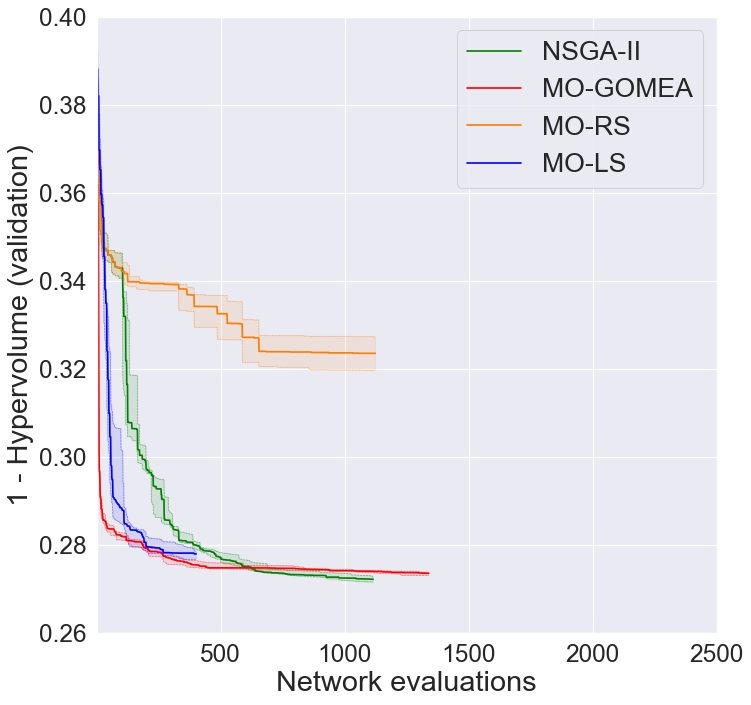

In [37]:
initPlottingStuff(26, 22, 24)
def plotAll (algorithms_to_plot, plot_until, plot="validation"):
    folder = "data/online/"
    global fig, ax
    fig, ax = plt.subplots(figsize=(10,10), dpi=80)

    maxruns = 6
    plotHyperVolume(ax, folder, "NSGA-II", plot_until, plot=plot, color=colors[0], label="NSGA-II", maxruns=maxruns)
    plotHyperVolume(ax, folder, "MO-GOMEA", plot_until, plot=plot, color=colors[1], label="MO-GOMEA", maxruns=maxruns)
    plotHyperVolume(ax, folder, "MO-RS", plot_until, plot=plot, color=colors[2], label="MO-RS", maxruns=maxruns)
    plotHyperVolume(ax, folder, "MO-LS", plot_until, plot=plot, color=colors[3], label="MO-LS", maxruns=maxruns)

    ax.legend()
#     ax.set_title("CIFAR-100 with online evaluations")
    ax.set_xlim(1, plot_until)
    ax.set_ylim(0.26, 0.4)
    ax.set_xlabel("Network evaluations")
    ax.set_ylabel("1 - Hypervolume ("+plot+")")
#     ax.set_xscale("log")

#     fig.savefig('python/imgs/online_hypervolume.png', dpi = 300, bbox_inches='tight')
#     fig.savefig('python/imgs/online_hypervolume.pdf', dpi = 300, bbox_inches='tight', format='pdf')
    
evaluations = 2500
# print("Hypervolume of different algorithms")
algorithms = ["MO-GOMEA", "NSGA-II", "MO-LS", "MO-RS"]
plot="validation"
plotAll(algorithms, evaluations, plot)
plt.show()

In [356]:
fig.savefig('python/imgs/online_hypervolume_test.pdf', dpi = 300, bbox_inches='tight', format='pdf')

#### F: gathering evaluated solutions in the online experiment

In [206]:
# Gathers evaluated solutions from the specified algorithms (which = regex {*, MO-GOMEA*, MO-RS*, MO-LS*, NSGA-II*})
def gatherPoints(which, outfilename):
    fns = glob.glob("data/online/" + which + "/progress0.json")  
    solutions = {}
    
    for fn in fns:
        with open(fn) as json_file:
            data = json.load(json_file)
            evaluated_solutions_fitness = data["evaluated_solution_fitness"]
            evaluated_solutions_genotypes = data["evaluated_solution_genotype"]
            for i in range(len(evaluated_solutions_genotypes)):
                solutions[evaluated_solutions_genotypes[i]] = evaluated_solutions_fitness[i]
    
    outfile = "data/online/points_"+outfilename+".json"
    with open(outfile, 'w') as outfile:
        json.dump(solutions, outfile)  

In [9]:
# gatherPoints("MO-RS*", "RS")

In [15]:
# gatherPoints("MO-GOMEA*", "MO-GOMEA")
# gatherPoints("MO-LS*", "MO-LS")
# gatherPoints("NSGA-II*", "NSGA-II")
# gatherPoints("MO-RS*", "MO-RS")

In [207]:
gatherPoints("*", "all_new")

### F: plotting of set of evaluated solutions in the online experiment

In [136]:
# Plots gathered points. Use e.g. plotRandomlySampledPoints(ax, "points_all.json")
def plotPoints(ax, filename, color="grey"):
    with open("data/online/"+filename) as json_file:
        data = json.load(json_file)
        random_solutions = np.zeros((len(data.keys()), 2))
        for i, genotype in enumerate(data):
            random_solutions[i,:] = data[genotype]
            
        
        ax.scatter(random_solutions[:,0], random_solutions[:,1], marker='.', color=color, s=5, alpha=0.1, zorder=1)

In [233]:
import pandas as pd
# df = pd.DataFrame([[ 1.82716998, -1.75449225],
#  [ 0.09258069,  0.16245259],
#  [ 1.09240926,  0.08617436]], columns=["x", "y"])
def plotKDE(ax, filename, color="grey"):
    with open("data/online/"+filename) as json_file:
        data = json.load(json_file)
        random_solutions = np.zeros((len(data.keys()), 2))
        for i, genotype in enumerate(data):
            random_solutions[i,:] = data[genotype]
            
        df = pd.DataFrame(random_solutions, columns=["x","y"])
        sns.kdeplot(df["x"], df["y"], ax=ax, color=color, shade=True, shade_lowest=False)
#         ax.scatter(random_solutions[:,0], random_solutions[:,1], marker='.', color=color, s=5, alpha=0.1, zorder=1)

In [11]:
# fig, ax = plt.subplots(1,1,figsize=(5,5))
# plotPoints(ax, "points_all.json")

### F: plotting archive Online

In [8]:
def plotArchiveOnline(ax, algorithm, run, pointInTime, plot="validation", color="black", label="undefined", marker="o"):
    folder = "data/online/"
    queriedFilename = folder + algorithm + "_run" + str(run) + "_seed*" + "/progress0.json"
    filenames = glob.glob(queriedFilename)
    filename = filenames[0]
    
    with open (filename) as json_file:
        data = json.load(json_file)
        
        # This is to find the index in the json at which the unique evaluations is equal to "pointInTime"
        for indexOfData in range(100000):
            if indexOfData >= len(data["network_unique_evals"]):
                print("There are no", pointInTime ,"network unique evaluations yet (data until", data["network_unique_evals"][indexOfData-1],")")
                return
            networkUniqueEvals = data["network_unique_evals"][indexOfData]
            if networkUniqueEvals == pointInTime:
                break
                
        archive = data["elitist_archive"][indexOfData]
        
        np_archive = np.zeros((len(archive), 2))
        genotypes = [""] * len(archive)
        for i, item in enumerate(archive):
            if plot is "validation":
                np_archive[i,0] = item['f'][0]
            elif plot is "test":
                genotypes[i] = item['g']
                
            np_archive[i,1] = item['f'][1]
            
        if plot is "test":
            np_archive[:, 0] = getTestAcc(genotypes)  
            np_archive, nopes = filterDominatedSolutions(np_archive)
            
        np_archive = np_archive[np.argsort(np_archive[:, 1])]

        np_blocky_front = generateBlockyFront(np_archive)
        
        ax.scatter(np_archive[:,0], np_archive[:,1], label=algorithm, color=color, marker=marker, zorder=10, s=25)
        ax.plot(np_blocky_front[:,0], np_blocky_front[:,1], color=color, zorder=5, lw=1, ls=(0, (5, 1)))
#         ax.fill_between(np_blocky_front[:,0], 0, np_blocky_front[:,1], color=color, alpha=0.1)

### F: Generating a blocky front for elitist archive plot

In [130]:
# Generates a np-array that contains the archive's values and their intersection points. This array can be used for plotting the line of the front.
def generateBlockyFront(np_archive):
    np_archive = np_archive[np.argsort(np_archive[:, 1][::-1])]
    np_blocky_archive = np.zeros((len(np_archive[:,1]) * 2 + 1, 2))
    
    np_blocky_archive[0,1] = np_archive[0,1]
    i = 0
    for i in range(len(np_archive[:,0])):
        np_blocky_archive[i*2 + 1, :] = np_archive[i,:]
        np_blocky_archive[i*2 + 2, 0] = np_archive[i,0]
        if i != (len(np_archive[:,0]) - 1):
            np_blocky_archive[i*2 + 2, 1] = np_archive[i+1,1]
    
    return np_blocky_archive

### Actual plotting of elitist archive

##### Old plotting stuff

In [ ]:
# fig, ax = plt.subplots(1,1, figsize=(10,10))
# evals = 100
# plotArchive(ax, "MO-GOMEA", 1, evals, "red", "o")
# plotArchive(ax, "MO-RS", 1, evals, "orange", "x")
# plotArchive(ax, "MO-LS", 3, evals, "blue", "^")
# plotArchive(ax, "NSGA-II", 2, evals, "green", "v")
# plotPoints(ax, "points_RS.json", color="orange")
# plotPoints(ax, "points_NSGA-II.json", color="green")
# plotPoints(ax, "points_MO-LS.json", color="blue")
# plotPoints(ax, "points_MO-GOMEA.json", color="red")
# ax.set_title("Elitist archives at " + str(evals) + " unique evaluations")
# ax.set_xlabel("Validation accuracy")
# ax.set_ylabel("1 - normalized MMACs")
# ax.set_xlim(0.5, 0.75)
# ax.set_xlim(0, 1)
# ax.set_ylim(0.2, 1.05)
# ax.set_ylim(0, 1)
# ax.legend()

##### New plotting stuff

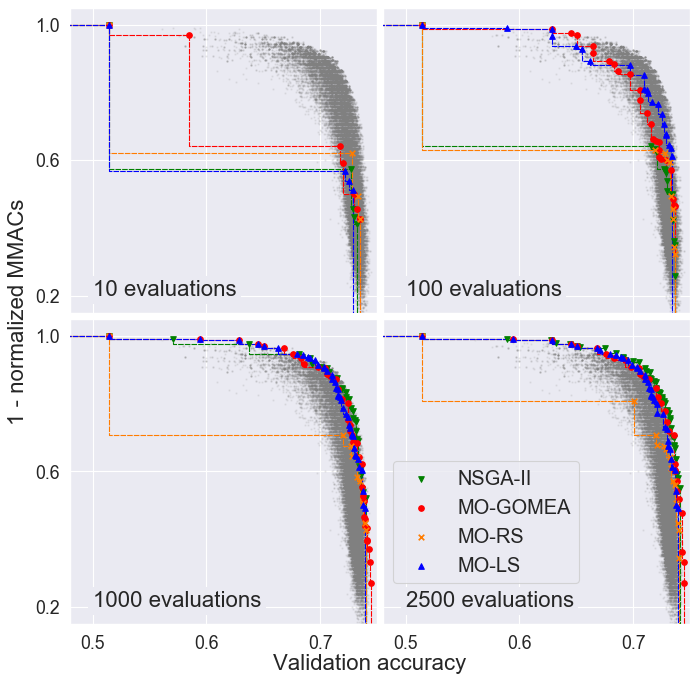

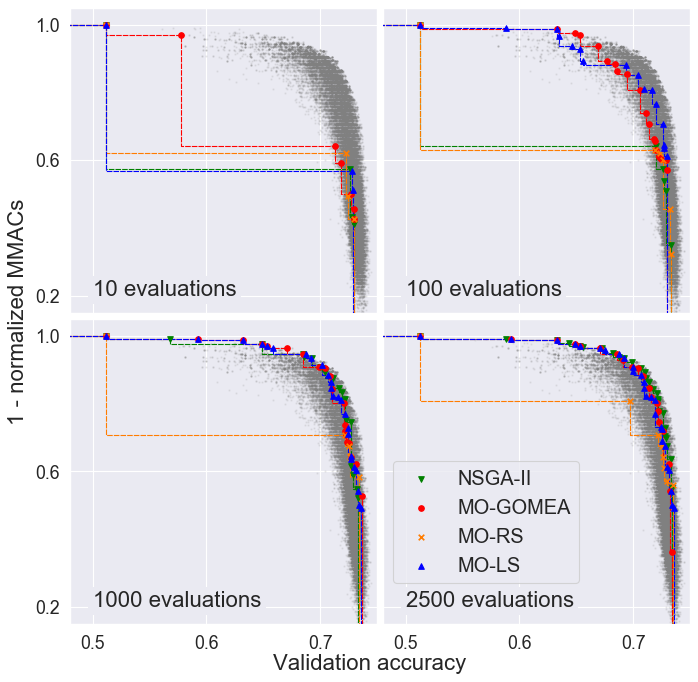

In [365]:
initPlottingStuff(20, 16, 18)

def plotArchives(evals_lst, plot="validation"):
    rows = 2
    columns = 2
    fig, ax_lst = plt.subplots(rows, columns, figsize=(columns * 5, rows * 5), dpi=80, sharex=True, sharey=True)
    if rows is not 1 and columns is not 1:
        ax_lst = [item for row in ax_lst for item in row]
    
    for ax, evals in zip(ax_lst, evals_lst):
            
        plotPoints(ax, "points_all_new.json", color="grey")
        
        plotArchiveOnline(ax, "NSGA-II", 2, evals, plot=plot, color=colors[0], marker="v", label="NSGA-II")
        plotArchiveOnline(ax, "MO-GOMEA", 1, evals, plot=plot, color=colors[1], marker="o", label="MO-GOMEA")
        plotArchiveOnline(ax, "MO-RS", 1, evals, plot=plot, color=colors[2], marker="x", label="MO-RS")
        plotArchiveOnline(ax, "MO-LS", 1, evals, plot=plot, color=colors[3], marker="^", label="MO-LS")

        ax.text(0.5, 0.2, str(evals) + " evaluations", fontsize=20, bbox=dict(facecolor=color_bg_default, \
                                                                              edgecolor="none"))
        ax.set_xlim(0.48, 0.75)
        ax.set_ylim(0.15, 1.05)
            
    # Common axis labels
    fig.text(0.5, 0.06, 'Validation accuracy', ha='center', va='center', fontsize=20)
    fig.text(0.06, 0.5, '1 - normalized MMACs', ha='center', va='center', rotation='vertical', fontsize=20)
    
    ax_lst[2].xaxis.set_major_locator(plt.MaxNLocator(3))
    ax_lst[0].yaxis.set_major_locator(plt.FixedLocator([0.2, 0.6, 1.0]))
    
    ax_lst[3].legend(loc=3, bbox_to_anchor=(0, 0.1))
    
    spacing = 0.02
    plt.subplots_adjust(hspace=spacing, wspace=spacing)
    
#     fig.savefig('python/imgs/online_pareto.png', dpi = 300, bbox_inches='tight')
#     fig.savefig('python/imgs/online_pareto.pdf', dpi = 300, bbox_inches='tight', format='pdf')

plotArchives([10, 100, 1000, 2500], plot="validation")
# plotArchives([10, 100, 1000, 2500], plot="test")

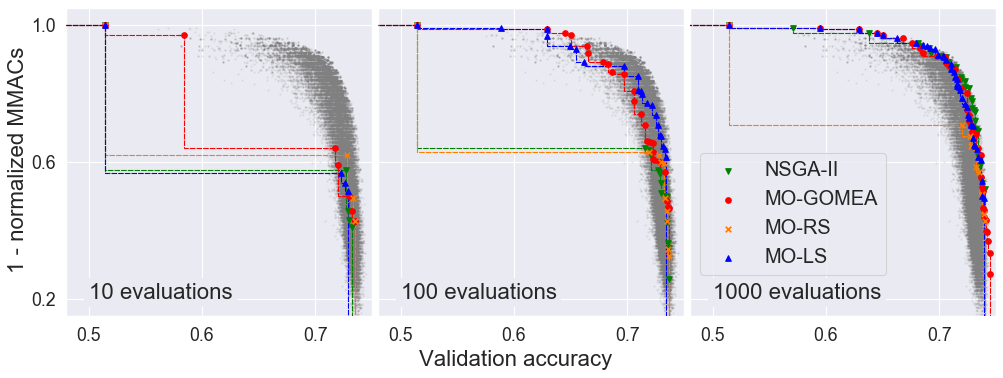

In [372]:
initPlottingStuff(20, 16, 18)

def plotArchives(evals_lst, plot="validation"):
    rows = 1
    columns = 3
    fig, ax_lst = plt.subplots(rows, columns, figsize=(columns * 5, rows * 5), dpi=80, sharex=True, sharey=True)
    if rows is not 1 and columns is not 1:
        ax_lst = [item for row in ax_lst for item in row]
    
    for ax, evals in zip(ax_lst, evals_lst):
            
        plotPoints(ax, "points_all_new.json", color="grey")
        
        plotArchiveOnline(ax, "NSGA-II", 2, evals, plot=plot, color=colors[0], marker="v", label="NSGA-II")
        plotArchiveOnline(ax, "MO-GOMEA", 1, evals, plot=plot, color=colors[1], marker="o", label="MO-GOMEA")
        plotArchiveOnline(ax, "MO-RS", 1, evals, plot=plot, color=colors[2], marker="x", label="MO-RS")
        plotArchiveOnline(ax, "MO-LS", 1, evals, plot=plot, color=colors[3], marker="^", label="MO-LS")

        ax.text(0.5, 0.2, str(evals) + " evaluations", fontsize=20, bbox=dict(facecolor=color_bg_default, \
                                                                              edgecolor="none"))
        ax.set_xlim(0.48, 0.75)
        ax.set_ylim(0.15, 1.05)
            
    # Common axis labels
    fig.text(0.5, 0, 'Validation accuracy', ha='center', va='center', fontsize=20)
    fig.text(0.085, 0.5, '1 - normalized MMACs', ha='center', va='center', rotation='vertical', fontsize=20)
    
#     ax_lst[2].xaxis.set_major_locator(plt.MaxNLocator(3))
    ax_lst[0].yaxis.set_major_locator(plt.FixedLocator([0.2, 0.6, 1.0]))
    
    ax_lst[2].legend(loc=3, bbox_to_anchor=(0, 0.1))
    
    spacing = 0.02
    plt.subplots_adjust(hspace=spacing, wspace=spacing)
    
    fig.savefig('python/imgs/online_pareto_val_1x3.png', dpi = 300, bbox_inches='tight')
    fig.savefig('python/imgs/online_pareto_val_1x3.pdf', dpi = 300, bbox_inches='tight', format='pdf')

plotArchives([10, 100, 1000], plot="validation")


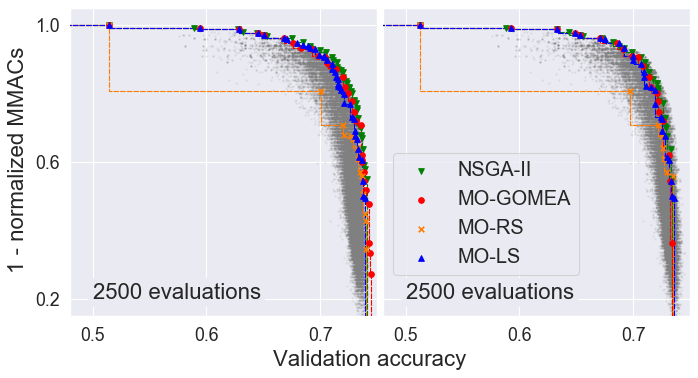

In [378]:
initPlottingStuff(20, 16, 18)

def plotArchives(plottypes):
    rows = 1
    columns = 2
    fig, ax_lst = plt.subplots(rows, columns, figsize=(columns * 5, rows * 5), dpi=80, sharex=True, sharey=True)
    if rows is not 1 and columns is not 1:
        ax_lst = [item for row in ax_lst for item in row]
    
    for ax, plot in zip(ax_lst, plottypes):
            
        plotPoints(ax, "points_all_new.json", color="grey")
        evals=2500
        plotArchiveOnline(ax, "NSGA-II", 2, evals, plot=plot, color=colors[0], marker="v", label="NSGA-II")
        plotArchiveOnline(ax, "MO-GOMEA", 1, evals, plot=plot, color=colors[1], marker="o", label="MO-GOMEA")
        plotArchiveOnline(ax, "MO-RS", 1, evals, plot=plot, color=colors[2], marker="x", label="MO-RS")
        plotArchiveOnline(ax, "MO-LS", 1, evals, plot=plot, color=colors[3], marker="^", label="MO-LS")

        ax.text(0.5, 0.2, str(evals) + " evaluations", fontsize=20, bbox=dict(facecolor=color_bg_default, \
                                                                              edgecolor="none"))
        ax.set_xlim(0.48, 0.75)
        ax.set_ylim(0.15, 1.05)
            
    # Common axis labels
    fig.text(0.5, 0, 'Validation accuracy', ha='center', va='center', fontsize=20)
    fig.text(0.06, 0.5, '1 - normalized MMACs', ha='center', va='center', rotation='vertical', fontsize=20)
    
#     ax_lst[2].xaxis.set_major_locator(plt.MaxNLocator(3))
    ax_lst[0].yaxis.set_major_locator(plt.FixedLocator([0.2, 0.6, 1.0]))
    
    ax_lst[1].legend(loc=3, bbox_to_anchor=(0, 0.1))
    
    spacing = 0.02
    plt.subplots_adjust(hspace=spacing, wspace=spacing)
    
    fig.savefig('python/imgs/online_pareto_valtest_1x2.png', dpi = 300, bbox_inches='tight')
    fig.savefig('python/imgs/online_pareto_valtest_1x2.pdf', dpi = 300, bbox_inches='tight', format='pdf')

plotArchives(plottypes=["validation","test"])

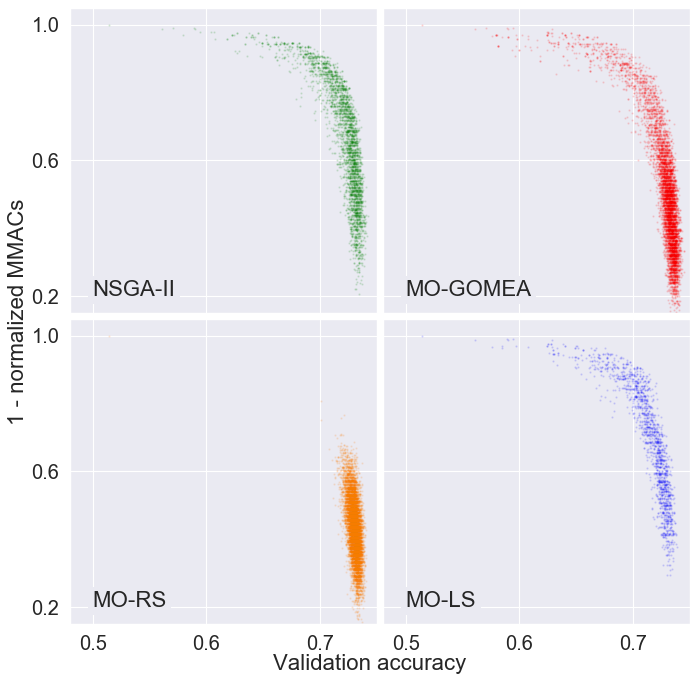

In [241]:
initPlottingStuff()
def plotQueriedPoints():
    rows = 2
    columns = 2
    fig, ax_lst = plt.subplots(rows, columns, figsize=(columns * 5, rows * 5), dpi=80, sharex=True, sharey=True)
    if rows is not 1 and columns is not 1:
        ax_lst = [item for row in ax_lst for item in row]
    
    algo_lst = ["NSGA-II", "MO-GOMEA", "MO-RS", "MO-LS"]
    i = 0
    for ax, algo in zip(ax_lst, algo_lst):
            
#         plotKDE(ax, "points_"+algo+".json", color=colors[i])
        plotPoints(ax, "points_"+algo+".json", color=colors[i])
#         plotArchiveOnline(ax, "NSGA-II", 2, evals, color=colors[0], marker="v", label="NSGA-II")
#         plotArchiveOnline(ax, "MO-GOMEA", 1, evals, color=colors[1], marker="o", label="MO-GOMEA")
#         plotArchiveOnline(ax, "MO-RS", 1, evals, color=colors[2], marker="x", label="MO-RS")
#         plotArchiveOnline(ax, "MO-LS", 1, evals, color=colors[3], marker="^", label="MO-LS")

        ax.text(0.5, 0.2, algo, fontsize=20, bbox=dict(facecolor=color_bg_default, \
                                                                              edgecolor="none"))
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xlim(0.48, 0.75)
        ax.set_ylim(0.15, 1.05)
        i += 1
                    
    # Common axis labels
    fig.text(0.5, 0.06, 'Validation accuracy', ha='center', va='center', fontsize=20)
    fig.text(0.06, 0.5, '1 - normalized MMACs', ha='center', va='center', rotation='vertical', fontsize=20)
    
    ax_lst[2].xaxis.set_major_locator(plt.MaxNLocator(3))
    ax_lst[0].yaxis.set_major_locator(plt.FixedLocator([0.2, 0.6, 1.0]))
    
#     ax_lst[3].legend(loc=3, bbox_to_anchor=(0, 0.1))
    
    spacing = 0.02
    plt.subplots_adjust(hspace=spacing, wspace=spacing)
    
    fig.savefig('python/imgs/online_pareto_points.png', dpi = 300, bbox_inches='tight')
    fig.savefig('python/imgs/online_pareto_points.pdf', dpi = 300, bbox_inches='tight', format='pdf')

plotQueriedPoints()

# Finding the minimum and maximum fitness value for MMACS

In [63]:
fns = glob.glob("data/online/*/progress0.json")
print(fns)
arr = []
for fn in fns:
    with open (fn) as json_file:
        data = json.load(json_file)
        for item in data["evaluated_solution_fitness"]:
            arr.append(item[1])
#             print(item[1])
# #             break
print(min(arr))

['data/online/MO-RS_run3_seed15/progress0.json', 'data/online/NSGA-II_run4_seed4/progress0.json', 'data/online/MO-LS_run4_seed4/progress0.json', 'data/online/MO-GOMEA_run1_seed10/progress0.json', 'data/online/MO-RS_run6_seed6/progress0.json', 'data/online/MO-LS_run3_seed15/progress0.json', 'data/online/MO-GOMEA_run2_seed14/progress0.json', 'data/online/MO-GOMEA_run5_seed5/progress0.json', 'data/online/NSGA-II_run3_seed15/progress0.json', 'data/online/NSGA-II_run5_seed5/progress0.json', 'data/online/MO-LS_run5_seed5/progress0.json', 'data/online/MO-GOMEA_run4_seed4/progress0.json', 'data/online/MO-RS_run2_seed14/progress0.json', 'data/online/NSGA-II_run6_seed6/progress0.json', 'data/online/MO-LS_run6_seed6/progress0.json', 'data/online/MO-LS_run1_seed10/progress0.json', 'data/online/MO-RS_run1_seed10/progress0.json', 'data/online/MO-RS_run4_seed4/progress0.json', 'data/online/MO-GOMEA_run3_seed15/progress0.json', 'data/online/MO-LS_run2_seed14/progress0.json', 'data/online/NSGA-II_run2_

# Analysis of MMAC values in the benchmark set

In [119]:
with open ("benchmarks/ark7/ark7_MO.json") as json_file:
    data = json.load(json_file)

In [120]:
val_acc = []
mmacs = []
genotypes = []
maxmmacs = -1
maxgenotype = ""
maxacc = -1
for i, item in enumerate(data):
    val_acc.append(data[item]['val_acc'])
    mmacs.append(data[item]['MMACs'])
    genotypes.append(item)
    if data[item]['MMACs'] > maxmmacs:
        maxmmacs = data[item]['MMACs']
        print (maxmmacs, item)
    if data[item]['val_acc'] > maxacc:
        maxacc = data[item]['val_acc']
        print(maxacc, item)
        
#     if i == 10:
#         break

128.38 I1I1221I121121
69.42 I1I1221I121121
142.96 12I22I1I22II22
150.45 21121211211II2
166.11 I21212212I222I
69.43 I21212212I222I
69.62 12I22I221I122I
69.78 I2I21121112212
167.39 2I2122221I1121
169.33 1111222222I2I2
69.87 I12121I1212221
69.92 12I22I221I1221
179.42 I21212212I2222
70.04 2211211I2I2221
180.77 22122222212III
187.23 22122222212II1
194.07 22122222212II2
196.28 212122122222I2
70.07 I1222122112212
70.09 1I2222I1112212
70.1 1222122221221I
70.14 1111212222I121
203.3 222222221I1122
70.15 2111221111222I
206.49 2221I222222212
218.09 222222222I1222
70.29 11112112I22121
70.35 12221I212122I2
231.01 22222122222222
70.37 12112211112222
70.38 122121121122I2
70.4 2221I112112211
70.41 112211221122I2
70.42 12212212121211
70.45 122111111122I2
70.47 121221111122I2
232.67 22222222222221
239.51 22222222222222
70.49 221111111122I2


In [102]:
print(np.min(mmacs))
print(np.max(mmacs))

21.31
239.28


(array([488., 484., 408., 424., 240., 274., 189., 344., 196., 180., 180.,
        156., 153.,  94.,  54.,  24., 113.,  52.,  76.,  32.,  40.,  64.,
         38.,  20.,   2.,  16.,  20.,   8.,   6.,  16.,  12.,  14.,   5.,
          2.,   0.,   0.,   4.,   0.,   0.,   4.,   4.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([200.07  , 200.8542, 201.6384, 202.4226, 203.2068, 203.991 ,
        204.7752, 205.5594, 206.3436, 207.1278, 207.912 , 208.6962,
        209.4804, 210.2646, 211.0488, 211.833 , 212.6172, 213.4014,
        214.1856, 214.9698, 215.754 , 216.5382, 217.3224, 218.1066,
        218.8908, 219.675 , 220.4592, 221.2434, 222.0276, 222.8118,
        223.596 , 224.3802, 225.1644, 225.9486, 226.7328, 227.517 ,
        228.3012, 229.0854, 229.8696, 230.6538, 231.438 , 232.2222,
        233.0064, 233.7906, 234.5748, 235.359 , 236.1432, 236.9274,
        237.7116, 238.4958, 239.28  ]),
 <a list of 50 Patch objects>)

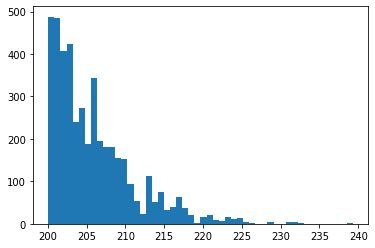

In [106]:
plt.hist(np.array(mmacs) [np.array(mmacs) > 200], bins=50)

In [108]:
1 - (200 - 21) / (239 - 21)

0.17889908256880738